In [ ]:
# Basic example loading images from the svhn dataset
import scipy.io as sio
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

# Mount Google Drive
drive.mount('/content/drive')
data_path = '/content/drive/Shared drives/DeepLearning_2022/PROJECT/Data/'
results_path = '/content/drive/Shared drives/DeepLearning_2022/PROJECT/Results/'

import csv

data = pd.read_csv(data_path+'russia_2.csv')
print(data.columns)
data = data[["text", "language"]]
data1 = data[data["language"] == 'en']
print(data1)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['Unnamed: 0', 'userid', 'username', 'acctdesc', 'location', 'following',
       'followers', 'totaltweets', 'usercreatedts', 'tweetid',
       'tweetcreatedts', 'retweetcount', 'text', 'hashtags', 'language',
       'coordinates', 'favorite_count', 'extractedts'],
      dtype='object')
                                                     text language
0       ⚡The Ukrainian Air Force would like to address...       en
1       Chernihiv oblast. Ukrainians welcome their lib...       en
2       America 🇺🇸 is preparing for something worse th...       en
3       JUST IN: #Anonymous has hacked &amp; released ...       en
4       ***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...       en
...                                                   ...      ...
364866  14-year-old Yura from #Bucha told how a Russia...       en
364869  #RussianUkrainianWar #UkraineRussianWar #Russi...       en
364871  “From where Winston stood it was just possible...       en
364872  When I said tonight in front

In [ ]:
data2 = {"tweet":[], "emoji":[]}
data2 = pd.DataFrame(data2)
data2["tweet"] = data1["text"]
data2 = data2.reset_index(drop=True)
print(data2)

                                                    tweet  emoji
0       ⚡The Ukrainian Air Force would like to address...    NaN
1       Chernihiv oblast. Ukrainians welcome their lib...    NaN
2       America 🇺🇸 is preparing for something worse th...    NaN
3       JUST IN: #Anonymous has hacked &amp; released ...    NaN
4       ***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...    NaN
...                                                   ...    ...
254621  14-year-old Yura from #Bucha told how a Russia...    NaN
254622  #RussianUkrainianWar #UkraineRussianWar #Russi...    NaN
254623  “From where Winston stood it was just possible...    NaN
254624  When I said tonight in front of 3000 people In...    NaN
254625  We’re back. No funny stuff #UKRAINE https://t....    NaN

[254626 rows x 2 columns]


In [ ]:
 pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 5.0 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=b865bb6565d9f37ba39ec4e2471cd00ffd45447459b528080880e6f6b245a9af
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
import emoji
#for each tweet we save the emoticons in emoji column
data2["emoji"].astype(str)
emojis_iter = map(lambda y: y, emoji.UNICODE_EMOJI['en'].keys())
regex_set = re.compile('|'.join(re.escape(en) for en in emojis_iter))
for i,t in enumerate(data2["tweet"]):
  data2.loc[i,"emoji"] = str(regex_set.findall(t))


In [ ]:
print(data2)

                                                    tweet  \
0       ⚡The Ukrainian Air Force would like to address...   
1       Chernihiv oblast. Ukrainians welcome their lib...   
2       America 🇺🇸 is preparing for something worse th...   
3       JUST IN: #Anonymous has hacked &amp; released ...   
4       ***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...   
...                                                   ...   
254621  14-year-old Yura from #Bucha told how a Russia...   
254622  #RussianUkrainianWar #UkraineRussianWar #Russi...   
254623  “From where Winston stood it was just possible...   
254624  When I said tonight in front of 3000 people In...   
254625  We’re back. No funny stuff #UKRAINE https://t....   

                                      emoji  
0                          ['⚡', '🇺🇦', '🧵']  
1                                        []  
2       ['🇺🇸', '🇹🇼', '🇷🇺', '🇺🇸', '🇨🇳', '👇']  
3                                        []  
4                                    

In [ ]:
#we only keep those rows that contain an emoticon
data3 = data2.drop(data2.loc[data2["emoji"]=='[]'].index)
data3 = data3.reset_index(drop=True)
print(data3)

                                                   tweet  \
0      ⚡The Ukrainian Air Force would like to address...   
1      America 🇺🇸 is preparing for something worse th...   
2      The Amazing story of Former Sussex County Dela...   
3      🇷🇺💢🇺🇦🛢️⛽️💶\n\nPutin says foreign buyers must p...   
4      The air war over #Ukraine is now a month old. ...   
...                                                  ...   
70012  In our daily Walter Report space we are lucky ...   
70013  In our daily Walter Report space we are lucky ...   
70014  The invasion of #Ukraine is unjustified and un...   
70015  The latest on the war in #Ukraine:\n\n➡️ Kyiv ...   
70016  @AP ❗️Game changer 💀x🔥\n#Ukraine Army Ambush #...   

                                     emoji  
0                         ['⚡', '🇺🇦', '🧵']  
1      ['🇺🇸', '🇹🇼', '🇷🇺', '🇺🇸', '🇨🇳', '👇']  
2                                   ['🇺🇸']  
3        ['🇷🇺', '💢', '🇺🇦', '🛢️', '⛽', '💶']  
4                                    ['👉']  
...      

In [ ]:
#we save it into a dataset
data3.to_csv(data_path+'russia_emoji.csv')

In [ ]:
#we read the dataset
data_emoji = pd.read_csv(data_path+'russia_emoji.csv', index_col = 0)

In [ ]:
print(data_emoji)

                                                   tweet emoji
0      ⚡The Ukrainian Air Force would like to address...    []
1      America 🇺🇸 is preparing for something worse th...    []
2      The Amazing story of Former Sussex County Dela...    []
3      🇷🇺💢🇺🇦🛢️⛽️💶\n\nPutin says foreign buyers must p...    []
4      The air war over #Ukraine is now a month old. ...    []
...                                                  ...   ...
70012  In our daily Walter Report space we are lucky ...    []
70013  In our daily Walter Report space we are lucky ...    []
70014  The invasion of #Ukraine is unjustified and un...    []
70015  The latest on the war in #Ukraine:\n\n➡️ Kyiv ...    []
70016  @AP ❗️Game changer 💀x🔥\n#Ukraine Army Ambush #...    []

[70017 rows x 2 columns]


In [ ]:
#according to covid related paper we define all the emoticons that we will use
emoji_pattern_1 = re.compile(u"(["                    
  u"\U0001F600" u"\U0001F602" u"\U0001F603" u"\U0001F604" u"\U0001F605" u"\U0001F606"u"\U0001F60A"u"\U0001F60D" #joy
  u"\U0001F632" u"\U0001F62E" u"\U0001F62F" #surprise
  u"\U0001F613" u"\U0001F614" u"\U0001F61E" u"\U0001F622" u"\U0001F62D" u"\U0001F623" #sad
  u"\U0001F620" u"\U0001F621" u"\U0001F624" #anger
  u"\U0001F628" u"\U0001F632" #fear
  u"\U0001F62C" #disgust
                "])", flags= re.UNICODE)           

In [ ]:
#we keep the emoticons in the pattern
data4 = data_emoji
for i,e in enumerate(data_emoji["emoji"]):
  data4.loc[i,"emoji"] = str(emoji_pattern_1.findall(e))


In [ ]:
#we keep only the rows that contain at least one of those emoticons
data5 = data4.drop(data4.loc[data4["emoji"]=='[]'].index)
data5 = data5.reset_index(drop=True)
print(data5)

                                                  tweet            emoji
0     The woman who was forced into child labour dur...            ['😭']
1     A group of children who fled #Mariupol are now...            ['😭']
2     @MZavala86 @RT_com Dictator Vladimir Putin has...            ['😂']
3     Yesterday in Brussels during a peaceful strike...            ['😓']
4     😡 The Russians who left the #Chornobyl nuclear...            ['😡']
...                                                 ...              ...
1616  Let’s stop the russian spelling and name it th...            ['😍']
1617  @night_mason 😭😭 omg that is so emotional. Bles...  ['😭', '😭', '😡']
1618  Hey #Germany! Are you going to start using #pe...       ['😂', '😂']
1619  @night_mason @Reuters 😭😭 omg that is so emotio...  ['😭', '😭', '😡']
1620  Go figure ...India won't condemn Russia for (t...            ['😬']

[1621 rows x 2 columns]


In [ ]:
#we save the dataset with 1621 rows
data5.to_csv(data_path+'russia_filtered_emoji.csv')

In [ ]:
#we read the dataset
data_emoji = pd.read_csv(data_path+'russia_emoji.csv', index_col = 0)

In [ ]:
#augmented emoji pattern that consider a few more emoticons
emoji_pattern_2 = re.compile(u"(["                    
  u"\U0001F600" u"\U0001F602" u"\U0001F603" u"\U0001F604" u"\U0001F605" u"\U0001F606"u"\U0001F60A"u"\U0001F60D" #joy 😀 😂 😃 😄 😅 😆 😊 😍
  u"\U0001F923" #added joy 🤣
  u"\U0001F632" u"\U0001F62E" u"\U0001F62F" #surprise 😲 😮 😯
  u"\U0001F613" u"\U0001F614" u"\U0001F61E" u"\U0001F622" u"\U0001F62D" u"\U0001F623" #sad 😓 😔 😞 😢 😭 😣
  u"\U0001F620" u"\U0001F621" u"\U0001F624" #anger 😠 😡 😤
  u"\U0001F92C" u"\U0001F47F" #added anger 🤬 👿
  u"\U0001F628" u"\U0001F632" #fear 😨 😲
  u"\U0001F62C" #disgust 😬
                "])", flags= re.UNICODE)   

In [ ]:
#we keep emoticons in the patterm
data6 = data_emoji
for i,e in enumerate(data_emoji["emoji"]):
  data6.loc[i,"emoji"] = str(emoji_pattern_2.findall(e))


In [ ]:
#we drop the rows that do not contain any of those emojis
data7 = data6.drop(data6.loc[data6["emoji"]=='[]'].index)
data7 = data7.reset_index(drop=True)
print(data7)

                                                  tweet  \
0     The woman who was forced into child labour dur...   
1     A group of children who fled #Mariupol are now...   
2     @MZavala86 @RT_com Dictator Vladimir Putin has...   
3     Yesterday in Brussels during a peaceful strike...   
4     😡 The Russians who left the #Chornobyl nuclear...   
...                                                 ...   
2104  This is really brutal! 🤬\n\nA Ukrainian office...   
2105  @night_mason 😭😭 omg that is so emotional. Bles...   
2106  Hey #Germany! Are you going to start using #pe...   
2107  @night_mason @Reuters 😭😭 omg that is so emotio...   
2108  Go figure ...India won't condemn Russia for (t...   

                          emoji  
0                         ['😭']  
1                         ['😭']  
2                         ['😂']  
3                         ['😓']  
4                         ['😡']  
...                         ...  
2104                      ['🤬']  
2105       ['😭', '😭

In [ ]:
#we save the dataset of 2109 rows
data7.to_csv(data_path+'russia_filtered_emoji_extended.csv')

In [ ]:
#we read the dataset
emojis = pd.read_csv(data_path+'russia_filtered_emoji_extended.csv', index_col = 0)

In [ ]:
#we add columns polarity and emotion
emojis["polarity"] = ""
emojis["emotion"] = ""

In [ ]:
#positive emoticons pattern
positive = re.compile(u"(["                    
  u"\U0001F600" u"\U0001F602" u"\U0001F603" u"\U0001F604" u"\U0001F605" u"\U0001F606"u"\U0001F60A"u"\U0001F60D"  #joy 😀 😂 😃 😄 😅 😆 😊 😍
  u"\U0001F923"#added joy 🤣
  u"\U0001F632" u"\U0001F62E" u"\U0001F62F" #surprise 😲 😮 😯
                "])", flags= re.UNICODE)   


In [ ]:
#negative emoticons pattern
negative = re.compile(u"(["                    
  u"\U0001F613" u"\U0001F614" u"\U0001F61E" u"\U0001F622" u"\U0001F62D" u"\U0001F623" #sad 😓 😔 😞 😢 😭 😣
  u"\U0001F620" u"\U0001F621" u"\U0001F624" #anger 😠 😡 😤
  u"\U0001F92C" u"\U0001F47F" #added anger 🤬 👿
  u"\U0001F628" u"\U0001F632" #fear 😨 😲
  u"\U0001F62C" #disgust 😬
                "])", flags= re.UNICODE)   

In [ ]:
#we set the corresponding polarity according to the emoticons ("positive" -> 1, "negative" -> 0, "ambiguous" -> -1)
#the "ambiguous" tag is for those that contain both positive and negative emoticons, so we are not going to consider them
data8 = emojis
for i,e in enumerate(emojis["emoji"]):
  if (re.search(positive,e) and re.search(negative,e)):
    data8.loc[i,"polarity"] = -1 #ambiguous
  elif re.search(positive,e):
    data8.loc[i,"polarity"] = 1 #positive
  elif re.search(negative,e):
    data8.loc[i,"polarity"] = 0 #negative

In [ ]:
print(emojis)

                                                  tweet  \
0     The woman who was forced into child labour dur...   
1     A group of children who fled #Mariupol are now...   
2     @MZavala86 @RT_com Dictator Vladimir Putin has...   
3     Yesterday in Brussels during a peaceful strike...   
4     😡 The Russians who left the #Chornobyl nuclear...   
...                                                 ...   
2104  This is really brutal! 🤬\n\nA Ukrainian office...   
2105  @night_mason 😭😭 omg that is so emotional. Bles...   
2106  Hey #Germany! Are you going to start using #pe...   
2107  @night_mason @Reuters 😭😭 omg that is so emotio...   
2108  Go figure ...India won't condemn Russia for (t...   

                          emoji polarity emotion  
0                         ['😭']        0          
1                         ['😭']        0          
2                         ['😂']        1          
3                         ['😓']        0          
4                         ['😡']     

In [ ]:
#here we can see the distribution of the 
data8["polarity"].value_counts()

 1    1126
 0     957
-1      26
Name: polarity, dtype: int64

In [ ]:
data9 = data8.drop(data8.loc[data8["polarity"]==-1].index)
data9 = data9.reset_index(drop=True)

In [ ]:
data9["polarity"].value_counts()

1    1126
0     957
Name: polarity, dtype: int64

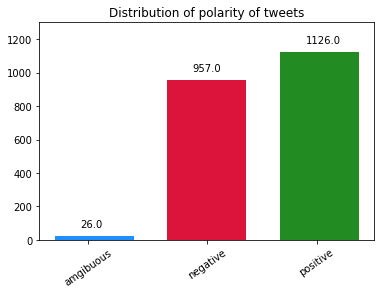

In [ ]:
color = ['dodgerblue','crimson','forestgreen']


n1,bins,patch=plt.hist( data8["polarity"],histtype='bar', bins=len(color),align='mid',rwidth=0.7)
for b,n,c, p in zip(bins,n1, color, patch):
  p.set_facecolor(c)
  plt.text(b+0.25, n+50, p.get_height(), fontsize=10)
  
plt.xticks(ticks=[-0.7,0,0.65],labels=['amgibuous','negative','positive'],rotation=35)
plt.ylim([0,1300])
plt.title("Distribution of polarity of tweets")

plt.show()

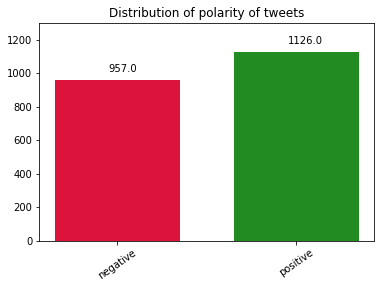

In [ ]:
color = ['crimson','forestgreen']

fig, ax = plt.subplots()

n1,bins,patch=plt.hist( data9["polarity"],histtype='bar', bins=len(color),align='mid',rwidth=0.7)
for b,n,c, p in zip(bins,n1, color, patch):
  p.set_facecolor(c)
  plt.text(b+0.225, n+50, p.get_height(), fontsize=10)
  
plt.xticks(ticks=[0.25,0.75],labels=['negative','positive'],rotation=35)
plt.ylim(0,1300)
plt.title("Distribution of polarity of tweets")

plt.show()

In [ ]:
print(data9)

                                                  tweet  \
0     The woman who was forced into child labour dur...   
1     A group of children who fled #Mariupol are now...   
2     @MZavala86 @RT_com Dictator Vladimir Putin has...   
3     Yesterday in Brussels during a peaceful strike...   
4     😡 The Russians who left the #Chornobyl nuclear...   
...                                                 ...   
2078  This is really brutal! 🤬\n\nA Ukrainian office...   
2079  @night_mason 😭😭 omg that is so emotional. Bles...   
2080  Hey #Germany! Are you going to start using #pe...   
2081  @night_mason @Reuters 😭😭 omg that is so emotio...   
2082  Go figure ...India won't condemn Russia for (t...   

                          emoji polarity emotion  
0                         ['😭']        0          
1                         ['😭']        0          
2                         ['😂']        1          
3                         ['😓']        0          
4                         ['😡']     

In [ ]:
#joy emoticons pattern
joy = re.compile(u"(["                    
  u"\U0001F600" u"\U0001F602" u"\U0001F603" u"\U0001F604" u"\U0001F605" u"\U0001F606"u"\U0001F60A"u"\U0001F60D"  #joy 😀 😂 😃 😄 😅 😆 😊 😍
  u"\U0001F923"#added joy 🤣
                "])", flags= re.UNICODE)   

In [ ]:
#surprise emoticons pattern
surprise = re.compile(u"(["
  u"\U0001F632" u"\U0001F62E" u"\U0001F62F" #surprise 😲 😮 😯
                "])", flags= re.UNICODE)   

In [ ]:
#sad emoticons pattern
sad = re.compile(u"(["                    
  u"\U0001F613" u"\U0001F614" u"\U0001F61E" u"\U0001F622" u"\U0001F62D" u"\U0001F623" #sad 😓 😔 😞 😢 😭 😣
                "])", flags= re.UNICODE)  

In [ ]:
#anger emoticons pattern
anger = re.compile(u"(["                    
  u"\U0001F620" u"\U0001F621" u"\U0001F624" #anger 😠 😡 😤
  u"\U0001F92C" u"\U0001F47F" #added anger 🤬 👿
                "])", flags= re.UNICODE)  

In [ ]:
#fear emoticons pattern
fear = re.compile(u"([" 
  u"\U0001F628" u"\U0001F632" #fear 😨 😲
                "])", flags= re.UNICODE)  

In [ ]:
#disgust emoticons pattern
disgust = re.compile(u"(["                    
  u"\U0001F62C" #disgust 😬
                "])", flags= re.UNICODE)  

In [ ]:
data10 = data9
for i,e in enumerate(data9["emoji"]):
  if (re.search(joy,e) and re.search(surprise,e)):
    data10.loc[i,"emotion"] = "joy_surprise" #joy_surprise
  elif (re.search(joy,e)):
    data10.loc[i,"emotion"] = 1 #joy
  elif (re.search(surprise,e)):
    data10.loc[i,"emotion"] = 2 #surprise
  elif (re.search(sad,e) and re.search(anger,e)):
    data10.loc[i,"emotion"] = "sad_anger" #sad_anger
  elif (re.search(sad,e) and re.search(fear,e)):
    data10.loc[i,"emotion"] = "sad_fear" #sad_fear
  elif (re.search(sad,e) and re.search(disgust,e)):
    data10.loc[i,"emotion"] = "sad_disgust" #sad_disgust
  elif (re.search(anger,e) and re.search(fear,e)):
    data10.loc[i,"emotion"] = "anger_fear" #anger_fear
  elif (re.search(anger,e) and re.search(disgust,e)):
    data10.loc[i,"emotion"] = "anger_disgust" #anger_disgust
  elif (re.search(fear,e) and re.search(disgust,e)):
    data10.loc[i,"emotion"] = "fear_disgust" #fear_disgust
  elif (re.search(sad,e)):
    data10.loc[i,"emotion"] = 3 #sad
  elif (re.search(anger,e)):
    data10.loc[i,"emotion"] = 4 #anger
  elif (re.search(fear,e)):
    data10.loc[i,"emotion"] = 5 #fear
  elif re.search(disgust,e):
    data10.loc[i,"emotion"] = 6 #disgust

In [ ]:
#here we can see the distribution of the 
data10["emotion"].value_counts()

1                1103
3                 496
4                 400
6                  46
2                  23
sad_anger           9
5                   5
anger_disgust       1
Name: emotion, dtype: int64

In [ ]:
#we save the dataset of 2083 rows
data10.to_csv(data_path+'emoticons_polarity_emotion.csv')

In [ ]:
data11 = data10.drop(data10.loc[data10["emotion"]=="sad_anger"].index)
data11 = data11.drop(data11.loc[data11["emotion"]=="anger_disgust"].index)
data11 = data11.reset_index(drop=True)
#we save the dataset of 2073 rows
data11.to_csv(data_path+'emoticons_polarity_emotion_filtered.csv')

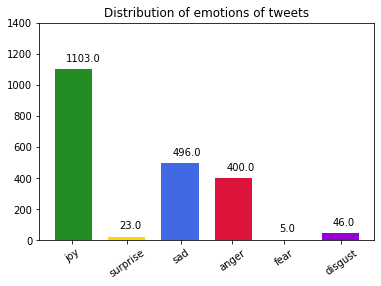

In [ ]:
color = ['forestgreen','gold','royalblue','crimson','darkorange','darkviolet']

fig, ax = plt.subplots()

n1,bins,patch=plt.hist( data11["emotion"],histtype='bar', bins=len(color),align='mid',rwidth=0.7)


for b,n,c, p in zip(bins,n1, color, patch):
  p.set_facecolor(c)
  plt.text(b+0.3, n+50, p.get_height(), fontsize=10)
  
plt.xticks(ticks=[1.4,2.25,3.1,3.9,4.7,5.6],labels=['joy','surprise','sad','anger','fear','disgust'],rotation=35)
plt.ylim([0,1400])

plt.title("Distribution of emotions of tweets")

plt.show()